## Canny Edge Detection

Weak Threshold of the Image: 13.911865234375
Strong Threshold of the Image: 41.735595703125


Text(0.5, 1.0, 'Image with Contours')

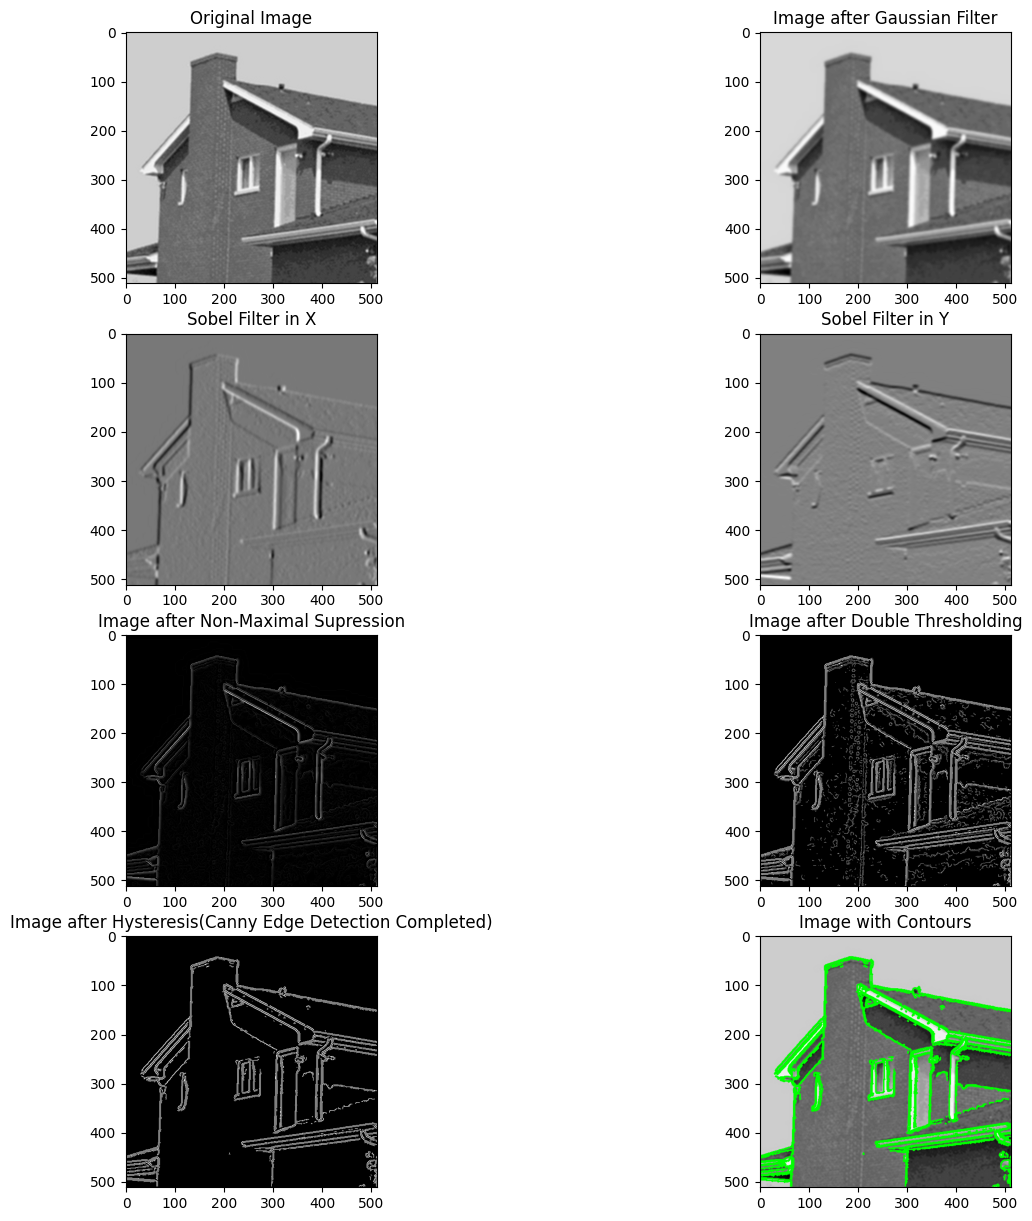

In [ ]:
#canny edge detection
#with contours also plotted
#steps
#1) Gaussian Kernal
#2) Sobel Filters
#3) Non Max Supression
#4) Threshold
#5) hysteresis
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import ndimage

fig=plt.figure(figsize=(15,15))

image_original=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/house.tif')
image1=cv2.cvtColor(image_original,cv2.COLOR_BGR2RGB)
image1=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)

#applying gaussian filter
image_gaussian=gaussian_filter(image1,sigma=2)

#applying sobel filter
#sobel kernels in x and y
Ix=cv2.Sobel(np.float32(image_gaussian),cv2.CV_64F,1,0,3)#1 for x direction with kernel size=3x3
Iy=cv2.Sobel(np.float32(image_gaussian),cv2.CV_64F,0,1,3)#0 for y direction with kernel size=3x3
#getting the polar coordinates from the cartesian coordinates
magnitude,angle=cv2.cartToPolar(Ix,Iy,angleInDegrees=True)

#finding the maxmimum magnitude
max_magnitude=np.max(magnitude)
#setting the minimum and maximum thresholds
weak_threshold=None
strong_threshold=None
if not weak_threshold:weak_threshold=max_magnitude*0.05
if not strong_threshold:strong_threshold=max_magnitude*0.15
print("Weak Threshold of the Image:",weak_threshold)
print("Strong Threshold of the Image:",strong_threshold)

#non maxmimal suppression
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    grad_angle=angle[j,i]
    grad_angle=abs(grad_angle-180) if abs(grad_angle)>180 else abs(grad_angle)#keeping the angles between the range 0-180

    #finding out the neighbors according to the current pixel based on the gradient angle

    if grad_angle<=22.5:
      neighbor1_x,neighbor1_y=i-1,j
      neighbor2_x,neighbor2_y=i+1,j
    elif (22.5<grad_angle<=67.5):
      neighbor1_x,neighbor1_y=i-1,j-1
      neighbor2_x,neighbor2_y=i+1,j+1
    elif (67.5<grad_angle<=112.5):
      neighbor1_x,neighbor1_y=i,j-1
      neighbor2_x,neighbor2_y=i,j+1
    elif (112.5<grad_angle<=157.5):
      neighbor1_x,neighbor1_y=i-1,j+1
      neighbor2_x,neighbor2_y=i+1,j-1
    elif (157.5<grad_angle<=202.5):
      neighbor1_x,neighbor1_y=i-1,j
      neighbor2_x,neighbor2_y=i+1,j

    #Non maximum suppression
    #changing the magnitude to 0 if any of the values are lesser
    if image1.shape[0]>neighbor1_x>=0 and image1.shape[1]>neighbor1_y>=0:
      if magnitude[j,i]<magnitude[neighbor1_y,neighbor1_x]:
        magnitude[j,i]=0

    if image1.shape[0]>neighbor2_x>=0 and image1.shape[1]>neighbor2_y>=0:
      if magnitude[j,i]<magnitude[neighbor2_y,neighbor2_x]:
        magnitude[j,i]=0


ids=np.zeros_like(image1)
final_img=np.zeros_like(image1)

#for double thresholding
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    gradient_magnitude=magnitude[j,i]
    if gradient_magnitude<weak_threshold:
      ids[j,i]=0 #for 0 value
    elif weak_threshold<=gradient_magnitude<=strong_threshold:
      ids[j,i]=1 #for weak pixel
    else:
      ids[j,i]=2 #for strong pixel

#for hysteresis
for i in range(0,image1.shape[0]-1):
  for j in range(0,image1.shape[1]-1):
    #for weak pixel
    if ids[j,i]==1:
      if((ids[j+1,i]==2) or (ids[j+1,i+1]==2) or (ids[j+1,i-1]==2) or (ids[j,i+1]==2) or (ids[j,i-1]==2) or (ids[j-1,i+1]==2) or (ids[j-1,i-1]==2) or (ids[j-1,i]==2)):
        final_img[j,i]=strong_threshold
      else:
        final_img[j,i]=0
    elif ids[j,i]==2:
      #for strong pixels
      final_img[j,i]=strong_threshold

fig.add_subplot(421)
plt.imshow(image1,cmap="gray")
plt.title("Original Image")

fig.add_subplot(422)
plt.imshow(image_gaussian,cmap="gray")
plt.title("Image after Gaussian Filter")

fig.add_subplot(423)
plt.imshow(Ix,cmap="gray")
plt.title("Sobel Filter in X")

fig.add_subplot(424)
plt.imshow(Iy,cmap="gray")
plt.title("Sobel Filter in Y")

fig.add_subplot(425)
plt.imshow(magnitude,cmap="gray")
plt.title("Image after Non-Maximal Supression")

fig.add_subplot(426)
plt.imshow(ids,cmap="gray")
plt.title("Image after Double Thresholding")

fig.add_subplot(427)
plt.imshow(final_img,cmap="gray")
plt.title("Image after Hysteresis(Canny Edge Detection Completed)")


#to find the contours
contours,_=cv2.findContours(final_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
image2=cv2.drawContours(image_original,contours,-1,(0,255,0),2)#-1 is for finding the contours


fig.add_subplot(428)
plt.imshow(image2,cmap="gray")
plt.title("Image with Contours")